# Student Performance Analysis Model

# Attributes

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)


# Grades

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)


In [418]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,roc_auc_score,accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import f1_score, recall_score, classification_report
from sklearn.metrics import fbeta_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [419]:
train1 = pd.read_csv('features.csv')

# One Hot Encoding on Final Grade

In [420]:
le=preprocessing.LabelEncoder()

In [421]:
le.fit(train1['FinalGrade'])
train1['FinalGrade']=le.transform(train1['FinalGrade'])
y=train1['FinalGrade']
# train1 = train1.drop(labels=['Regularity','Grade1','Grade2'],axis=1)


In [422]:
train1 = pd.get_dummies(train1)


In [423]:
train1.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,0,1
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,0,0,1
2,15,1,1,1,2,0,4,3,2,2,...,0,0,0,0,1,0,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,0,0,1,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,0,1,0,0,0,0,1
5,16,4,3,1,2,0,5,4,2,1,...,0,0,0,0,1,0,0,0,0,1
6,16,2,2,1,2,0,4,4,4,1,...,0,0,0,0,1,0,0,0,0,1
7,17,4,4,2,2,0,4,1,4,1,...,0,0,0,1,0,0,0,0,0,1
8,15,3,2,1,2,0,4,2,2,1,...,0,0,1,0,0,0,0,1,0,0
9,15,3,4,1,2,0,5,5,1,1,...,0,0,0,0,1,0,0,0,0,1


# Feature Drop

In [424]:
# y=train1.FinalGrade
train1 = train1.drop(labels=['G3','FinalGrade','Fjob_at_home','Fjob_teacher','Pstatus_A','Pstatus_T'],axis=1)
train1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,0,1
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,0,0,1
2,15,1,1,1,2,0,4,3,2,2,...,0,0,0,0,1,0,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,0,0,1,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,0,1,0,0,0,0,1


# SPLIT DATA 

In [425]:
x_train,x_val,y_train,y_val = train_test_split(train1,y,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(783, 70)
(783,)
(261, 70)
(261,)


# Confusion Matrix

In [426]:
def confusionmatrix(y_val,y_pred):
    labels = list(range(0,5))
    cm=confusion_matrix(y_val,y_pred)
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    total = lambda x : x.sum()/5
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print('percentage of sensitivity = '+str(total(TPR)*100))

    # Specificity or true negative rate
    TNR = TN/(TN+FP) 

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print('percentage of precision = '+str(total(PPV)*100))
    # Negative predictive value
    NPV = TN/(TN+FN)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('Accuracy percentage = '+str(total(ACC)*100))

# ROC plot

In [427]:
def ROC_plot(x_train,x_val,model):
    train = pd.read_csv('features.csv')
    train.head()
    y=train[['FinalGrade']]
    train = train.drop(['G3'],axis=1);
    train = train.drop(['FinalGrade'],axis=1);
    train = train.drop(['G2'],axis=1);
    train = train.drop(['G1'],axis=1);
    y = label_binarize(y, classes=['Failure','Poor','Satisfactory','Good','Excellent'])
    n_classes = y.shape[1]
    
    X_train, X_test, y_train, y_test = train_test_split(train,y,random_state=0)
    
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(x_train, y_train).decision_function(x_val)
    y_score.shape
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
    # Individual ROC
    plt.figure()
    lw = 2
    for i in (0,1):
        plt.subplot(1,2,i+1)
        plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic label'+str(i))
        plt.legend(loc="lower right")

    plt.plot()

    plt.figure()
    lw = 2
    for i in (2,3):
        plt.subplot(1,2,i-1)
        plt.plot(fpr[i], tpr[i], color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic label'+str(i))
        plt.legend(loc="lower right")

    plt.plot()

    plt.figure()
    lw = 2
    plt.subplot(1,2,1)
    plt.plot(fpr[4], tpr[4], color='grey',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[4])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic label'+str(4))
    plt.legend(loc="lower right")
    plt.plot()
    
    
    # Combined ROC
    
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
        print('Area Under the Curve with label '+str(i)+' is '+str(roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (10,6)

# Fscore

In [428]:
def Fscore(y_val,y_pred):
    print('f score = ' + str(f1_score(y_val, y_pred, average="macro")))

# Recall

In [429]:
def recall(y_val,y_pred):
    print('percentage of recall score = '+str(recall_score(y_val, y_pred, average="macro"))) 

# Classification Report

In [430]:
def report(y_val,y_pred):
    target_names = ['Failure','Poor','Satisfactory','Good','Excellent']
    print('Classification Report')
    print(classification_report(y_val, y_pred, target_names=target_names))

# F Beta score

In [431]:
def fbeta(y_val,y_pred):
    print('Fbeta score = ' + str(fbeta_score(y_val,y_pred,average='macro', beta=0.5)))

# LOGISTIC REGRESSION 

In [432]:
def logistic_regression_model(x_train,y_train,x_val,y_val):
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_val)
    y_predict = lr.predict_proba(x_val)
    print("Log_Loss: ",log_loss(y_val,y_predict))
    print("Accuracy_Score: ",accuracy_score(y_val,y_pred))
    confusionmatrix(y_val,y_pred)
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    return lr

/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Log_Loss:  0.5178333435977416
Accuracy_Score:  0.8199233716475096
percentage of sensitivity = 70.95730466462173
percentage of precision = 77.88758418612787
Accuracy percentage = 92.7969348659004
f score = 0.7343548463023113
percentage of recall score = 0.7095730466462173
Classification Report
              precision    recall  f1-score   support

     Failure       0.67      0.67      0.67         6
        Poor       0.67      0.40      0.50        15
Satisfactory       0.94      0.73      0.82        41
        Good       0.78      0.88      0.82        91
   Excellent       0.85      0.87      0.86       108

   micro avg       0.82      0.82      0.82       261
   macro avg       0.78      0.71      0.73       261
weighted avg       0.82      0.82      0.82       261

Fbeta score = 0.7578307657748581


/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

Area Under the Curve with label 0 is 0.9533875338753388
Area Under the Curve with label 1 is 0.922365869424693
Area Under the Curve with label 2 is 0.8939118857419512
Area Under the Curve with label 3 is 0.978381374722838
Area Under the Curve with label 4 is 0.9928104575163399


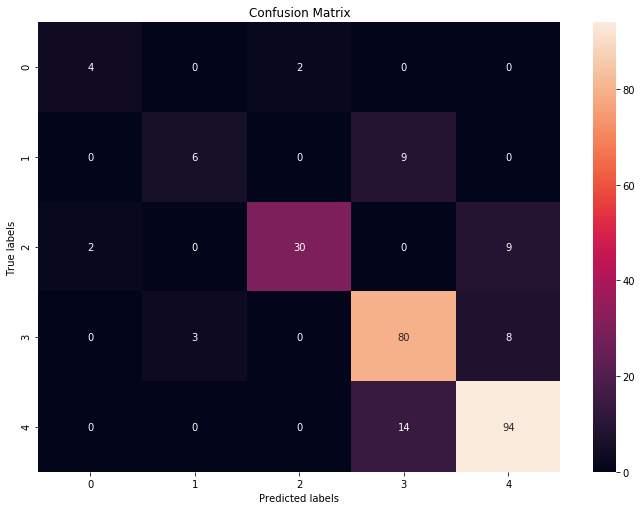

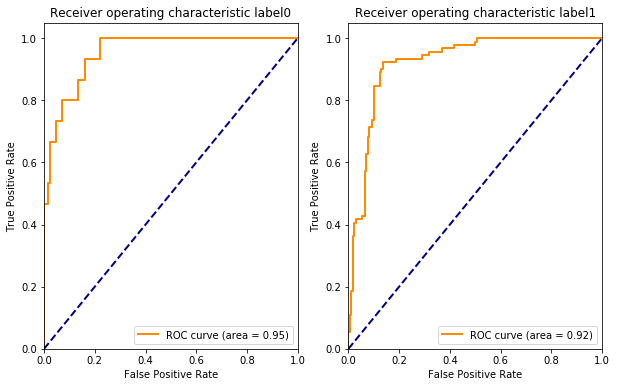

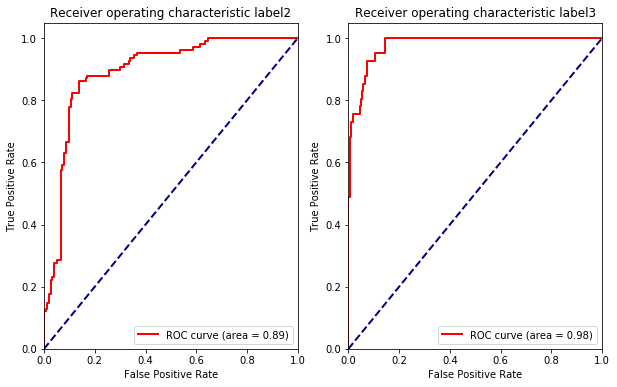

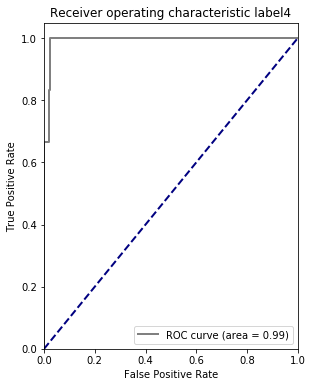

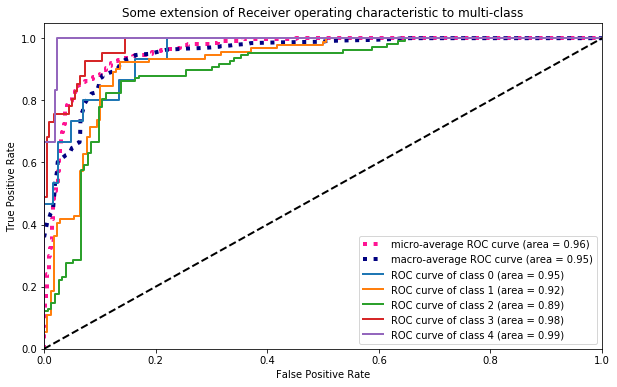

In [433]:
model =logistic_regression_model(x_train,y_train,x_val,y_val)
ROC_plot(x_train,x_val,model)

# RANDOM FOREST

In [434]:
def random_forest_model(x_train,y_train,x_val,y_val):
    random_forest = RandomForestClassifier(n_estimators=28,max_depth=5,random_state=0)

    forest = random_forest.fit(x_train, y_train)
    print("Random Forest Train data Score" , ":" , forest.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , forest.score(x_val, y_val))
    Y_pred = random_forest.predict_proba(x_val)
    Y_pred1 = random_forest.predict(x_val)
    print("Log_Loss: ",log_loss(y_val,Y_pred))
    confusionmatrix(y_val,Y_pred1)
    Fscore(y_val,Y_pred1)
    recall(y_val,Y_pred1)
    report(y_val,Y_pred1)
    fbeta(y_val,Y_pred1)
    return forest

Random Forest Train data Score : 0.8620689655172413 , Validation data Score : 0.8160919540229885
Log_Loss:  0.5500067951388179
percentage of sensitivity = 70.73752444484151
percentage of precision = 79.21069755335762
Accuracy percentage = 92.64367816091955
f score = 0.7359310376186469
percentage of recall score = 0.7073752444484152
Classification Report
              precision    recall  f1-score   support

     Failure       0.67      0.67      0.67         6
        Poor       0.75      0.40      0.52        15
Satisfactory       0.94      0.73      0.82        41
        Good       0.77      0.87      0.82        91
   Excellent       0.83      0.87      0.85       108

   micro avg       0.82      0.82      0.82       261
   macro avg       0.79      0.71      0.74       261
weighted avg       0.82      0.82      0.81       261

Fbeta score = 0.7646814768245026


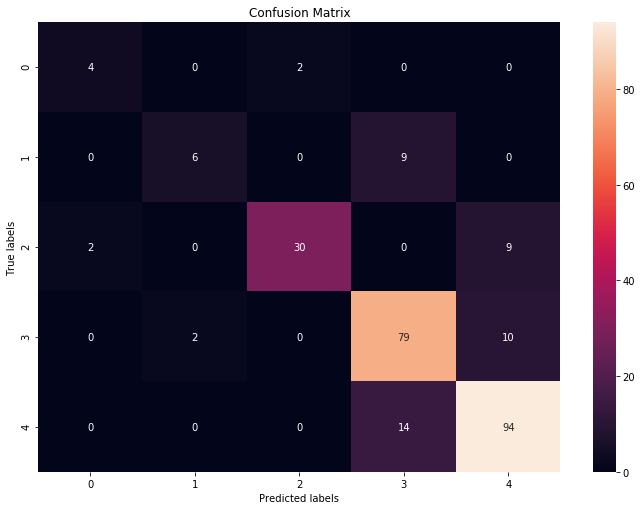

In [435]:
model = random_forest_model(x_train,y_train,x_val,y_val)

# SVM

In [436]:
def SVM_Model(X_train,Y_train,X_test,y_val):
    svc = SVC()
    svc.fit(X_train, Y_train)
    Y_pred = svc.predict(X_test)
    print("SVM Train data Score" , ":" , svc.score(X_train, y_train)
          , "," ,"Validation data Score" ,":" , svc.score(X_test, y_val))
    confusionmatrix(y_val,Y_pred)
    Fscore(y_val,Y_pred)
    recall(y_val,Y_pred)
    report(y_val,Y_pred)
    fbeta(y_val,Y_pred)
    return svc

/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Train data Score : 0.8876117496807152 , Validation data Score : 0.842911877394636
percentage of sensitivity = 78.18728967509456
percentage of precision = 88.32161708460966
Accuracy percentage = 93.71647509578544
f score = 0.8161781348992581
percentage of recall score = 0.7818728967509456
Classification Report
              precision    recall  f1-score   support

     Failure       0.83      0.83      0.83         6
        Poor       1.00      0.53      0.70        15
Satisfactory       0.94      0.78      0.85        41
        Good       0.80      0.90      0.85        91
   Excellent       0.85      0.86      0.85       108

   micro avg       0.84      0.84      0.84       261
   macro avg       0.88      0.78      0.82       261
weighted avg       0.85      0.84      0.84       261

Fbeta score = 0.8504002910604476


/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rohith/anaconda3/lib/python3.6/site-packages/skle

Area Under the Curve with label 0 is 0.97289972899729
Area Under the Curve with label 1 is 0.9313510019392373
Area Under the Curve with label 2 is 0.9340353425320745
Area Under the Curve with label 3 is 0.987139689578714
Area Under the Curve with label 4 is 0.9973856209150327


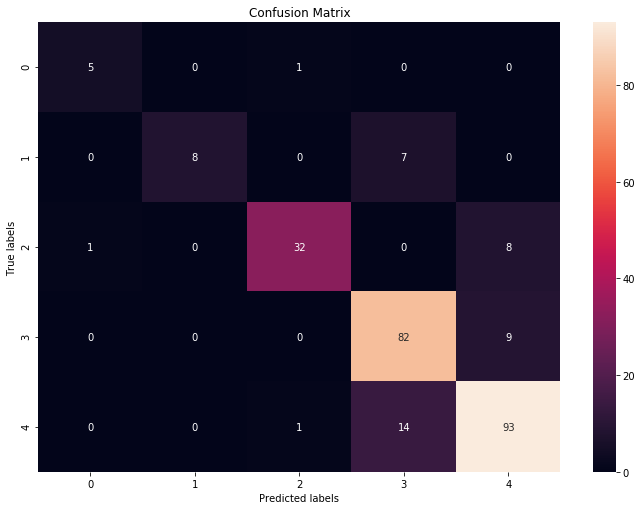

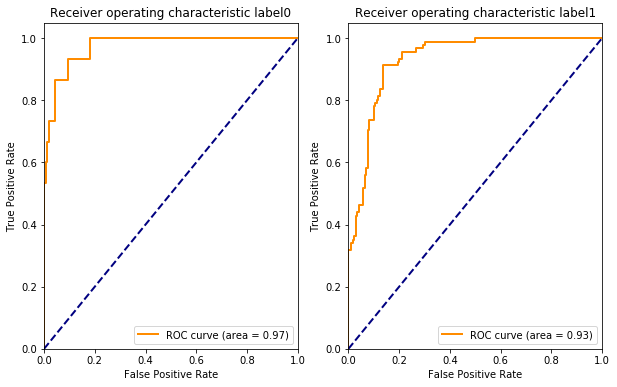

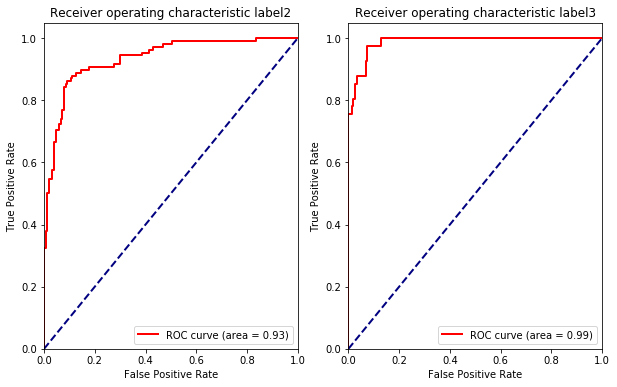

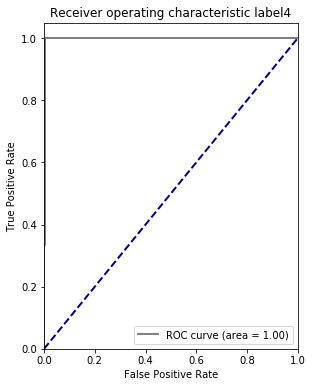

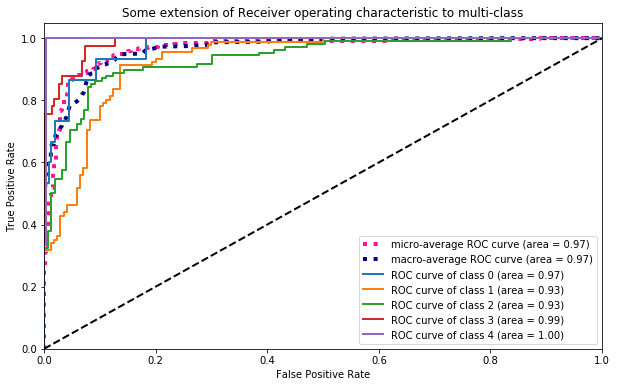

In [437]:
model = SVM_Model(x_train,y_train,x_val,y_val)
ROC_plot(x_train,x_val,model)

# DECISION TREE

In [438]:
def Decison_tree_Model(x_train,y_train,x_val,y_val):
    tree = DecisionTreeClassifier(min_samples_leaf=9,random_state=0)
    tf= tree.fit(x_train, y_train)
    y_pred = tf.predict(x_val)
    y_predict = tf.predict_proba(x_val)
    print("Decisioin Tree Train data Score" , ":" , tf.score(x_train, y_train) 
          , "," , "Validation data Score" ,":" , tf.score(x_val, y_val))
    confusionmatrix(y_val,y_pred)
    print("Log_Loss: ",log_loss(y_val,y_predict))
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    return tree

Decisioin Tree Train data Score : 0.8671775223499362 , Validation data Score : 0.8352490421455939
percentage of sensitivity = 84.70339597168865
percentage of precision = 78.16673491673491
Accuracy percentage = 93.40996168582377
Log_Loss:  1.7419152630748576
f score = 0.8033768498313509
percentage of recall score = 0.8470339597168864
Classification Report
              precision    recall  f1-score   support

     Failure       0.60      1.00      0.75         6
        Poor       0.69      0.73      0.71        15
Satisfactory       0.94      0.83      0.88        41
        Good       0.83      0.80      0.82        91
   Excellent       0.85      0.87      0.86       108

   micro avg       0.84      0.84      0.84       261
   macro avg       0.78      0.85      0.80       261
weighted avg       0.84      0.84      0.84       261

Fbeta score = 0.7885344808414613


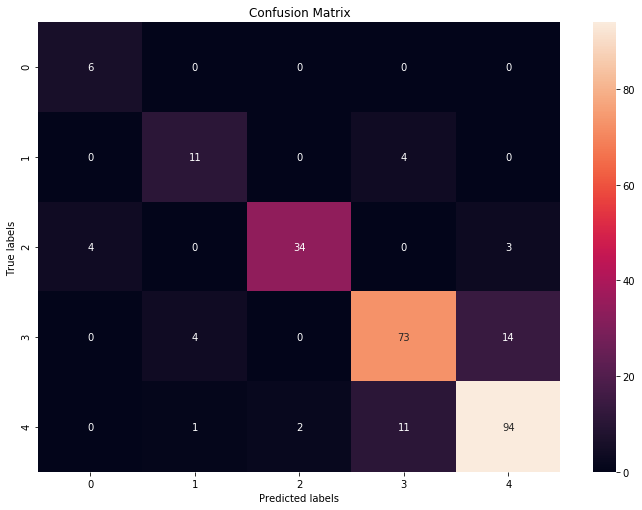

In [439]:
model = Decison_tree_Model(x_train,y_train,x_val,y_val)

# ADA BOOST

In [440]:
def ada_boost_model(x_train,y_train,x_val,y_val):
    ada = AdaBoostClassifier(n_estimators=2)
    af = ada.fit(x_train, y_train)
    y_pred = af.predict(x_val)
    y_predict = af.predict_proba(x_val)
    print("Ada Boost Train data Score" , ":" , af.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , af.score(x_val, y_val))
    print("Log_Loss: ",log_loss(y_val,y_predict))
    confusionmatrix(y_val,y_pred)
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    return ada

Ada Boost Train data Score : 0.7675606641123882 , Validation data Score : 0.7931034482758621
Log_Loss:  0.678003328537191
percentage of sensitivity = 53.378698988455085
percentage of precision = nan
Accuracy percentage = 91.72413793103449
f score = 0.4966256670571392
percentage of recall score = 0.5337869898845509
Classification Report
              precision    recall  f1-score   support

     Failure       0.00      0.00      0.00         6
        Poor       0.00      0.00      0.00        15
Satisfactory       0.73      0.98      0.83        41
        Good       0.73      0.93      0.82        91
   Excellent       0.92      0.76      0.83       108

   micro avg       0.79      0.79      0.79       261
   macro avg       0.48      0.53      0.50       261
weighted avg       0.75      0.79      0.76       261

Fbeta score = 0.4820380879923783


/home/rohith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/rohith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'pred

Area Under the Curve with label 0 is 0.8715447154471545
Area Under the Curve with label 1 is 0.9103749191984486
Area Under the Curve with label 2 is 0.9097676107480028
Area Under the Curve with label 3 is 0.9756097560975611
Area Under the Curve with label 4 is 0.988235294117647


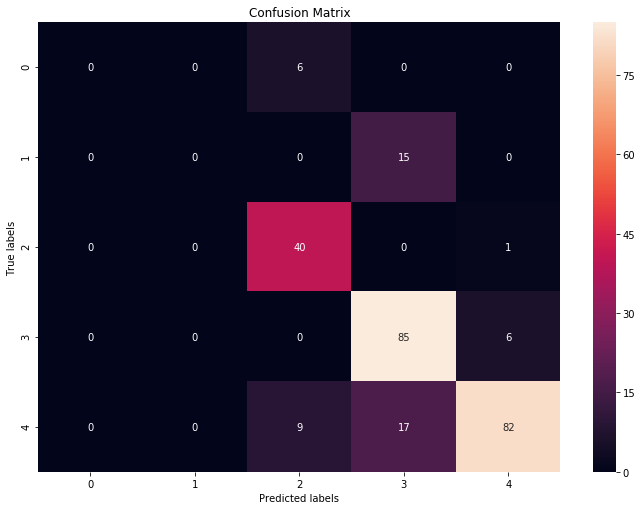

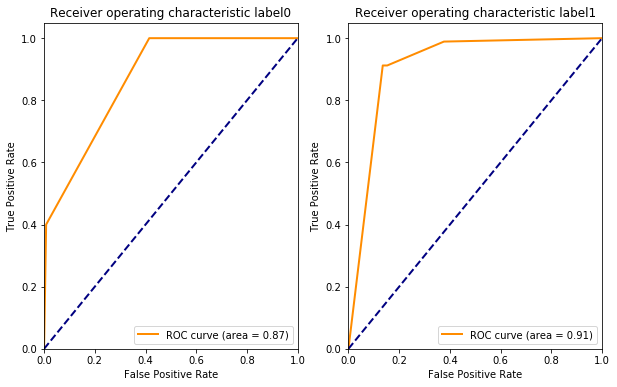

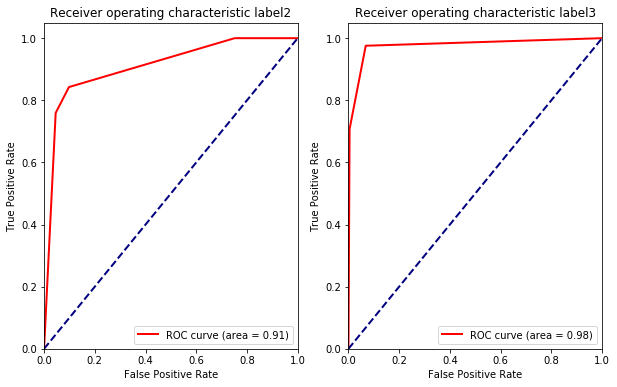

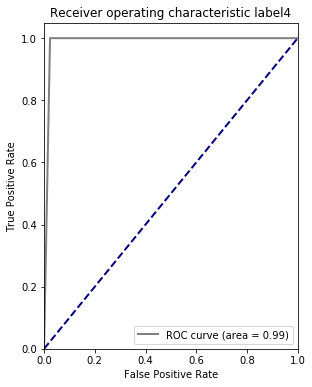

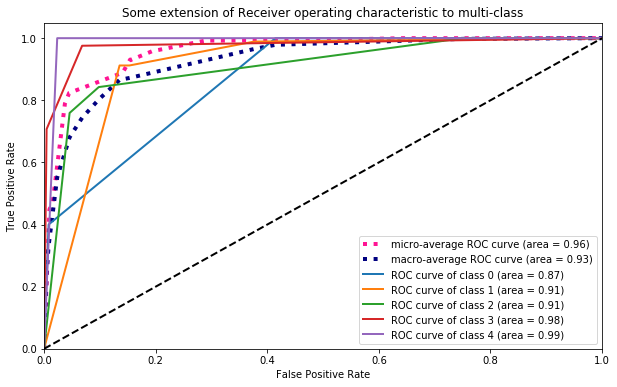

In [441]:
model = ada_boost_model(x_train,y_train,x_val,y_val)
ROC_plot(x_train,x_val,model)

# XGBOOST

In [442]:
def XGBoost(x_train,y_train,x_val,y_val):
    model = XGBClassifier()
    model = XGBClassifier(learning_rate=0.1,n_estimators=80)
    mf = model.fit(x_train,y_train)
    y_pred=model.predict(x_val)
    y_predict = mf.predict_proba(x_val)
    print("XGBoost Train data Score" , ":" , mf.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , mf.score(x_val, y_val))
    print("Log_Loss: ",log_loss(y_val,y_predict))
    confusionmatrix(y_val,y_pred)
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    
    
    # plot feature importance
    fig, ax = plt.subplots(figsize=(10, 20))
    plot_importance(model, ax=ax)

    plt.show()
    return model
    
    

XGBoost Train data Score : 0.9386973180076629 , Validation data Score : 0.8850574712643678
Log_Loss:  0.3860022797538289
percentage of sensitivity = 89.47816591719031
percentage of precision = 89.39073297836184
Accuracy percentage = 95.40229885057471
f score = 0.8920378627465831
percentage of recall score = 0.8947816591719031
Classification Report
              precision    recall  f1-score   support

     Failure       0.86      1.00      0.92         6
        Poor       0.92      0.80      0.86        15
Satisfactory       0.95      0.90      0.92        41
        Good       0.85      0.90      0.87        91
   Excellent       0.90      0.87      0.88       108

   micro avg       0.89      0.89      0.89       261
   macro avg       0.89      0.89      0.89       261
weighted avg       0.89      0.89      0.89       261

Fbeta score = 0.8926126068839595


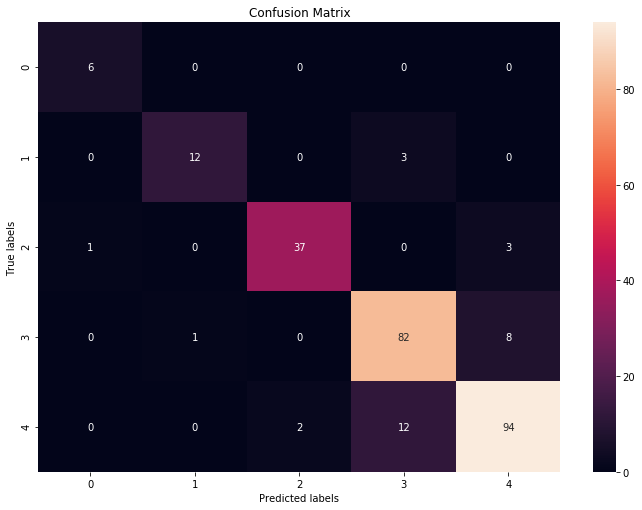

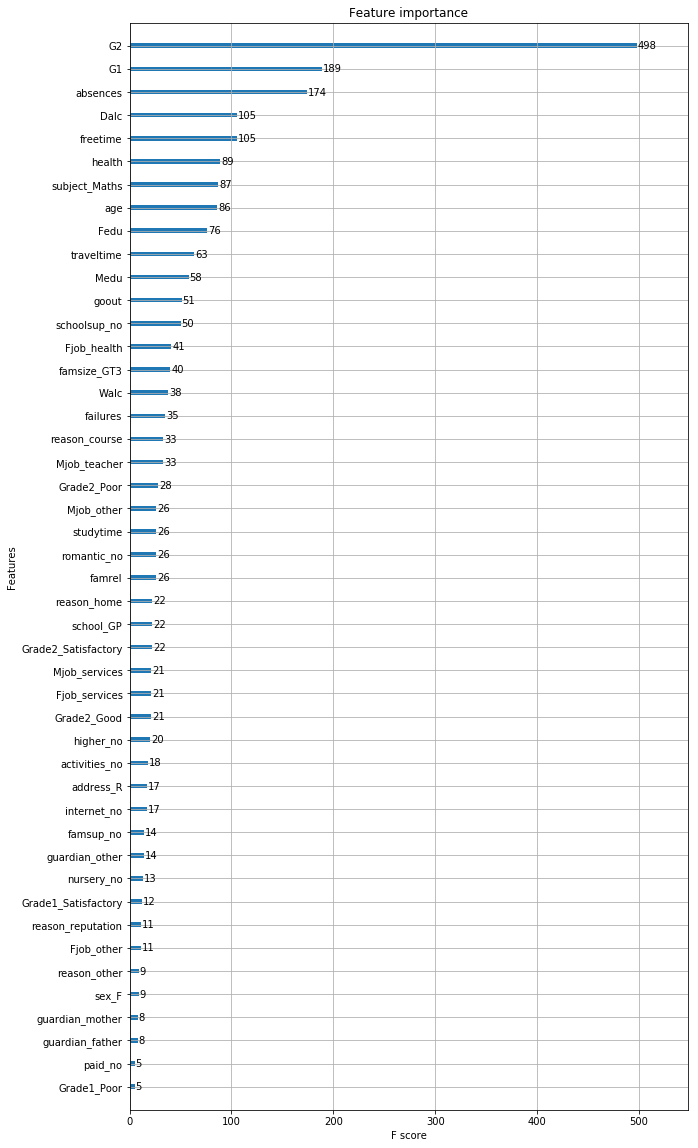

In [443]:
model = XGBoost(x_train,y_train,x_val,y_val)

# K Cross Validations

In [444]:
def k_cross_validations(x_train,y_train,):
    X = x_train
    y = y_train
    kf = KFold(n_splits=10) # Define the split - into 2 folds 
    kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
    print(kf) 
    KFold(n_splits=10, random_state=None, shuffle=False)
    return kf

In [445]:
kf = k_cross_validations(x_train,y_train)
classifier = model
cross_val_score(classifier,x_train, y_train, cv=kf, n_jobs=1)

KFold(n_splits=10, random_state=None, shuffle=False)


array([0.83544304, 0.86075949, 0.81012658, 0.82051282, 0.83333333,
       0.79487179, 0.84615385, 0.80769231, 0.79487179, 0.85897436])

In [446]:
def FeatureImportance():
    # Build a classification task using 3 informative features
    X, y = make_classification(n_samples=1000,
                               n_features=10,
                               n_informative=3,
                               n_redundant=0,
                               n_repeated=0,
                               n_classes=2,
                               random_state=0,
                               shuffle=False)

    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


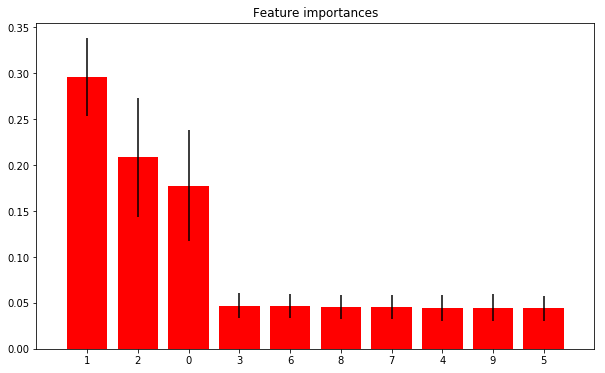

In [447]:
FeatureImportance()